In [2]:
library('tidyverse')

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
df = read_csv('https://raw.githubusercontent.com/ctumminello/BIOS512/main/Respiratory_Illness_Data.csv')


── Column specification ────────────────────────────────────────────────────────
cols(
  SchoolNum = col_character(),
  StudentID = col_double(),
  Gender = col_character(),
  Zip = col_double(),
  Age = col_double(),
  Asthma = col_double(),
  RAD = col_double(),
  Bronchitis = col_double(),
  Wheezing = col_double(),
  Medication = col_double(),
  WMonth = col_double(),
  MissDays = col_double()
)




In [22]:
table(df['Asthma'])


  0   1 
709  91 

In [23]:
table(df['RAD'])


  0   1 
707  93 

In [24]:
table(df['Bronchitis'])


  0   1 
714  86 

In [25]:
table(df['Wheezing'])


  0   1 
701  99 

For Question 1, wheezing is the most common respiritory condition/symptom

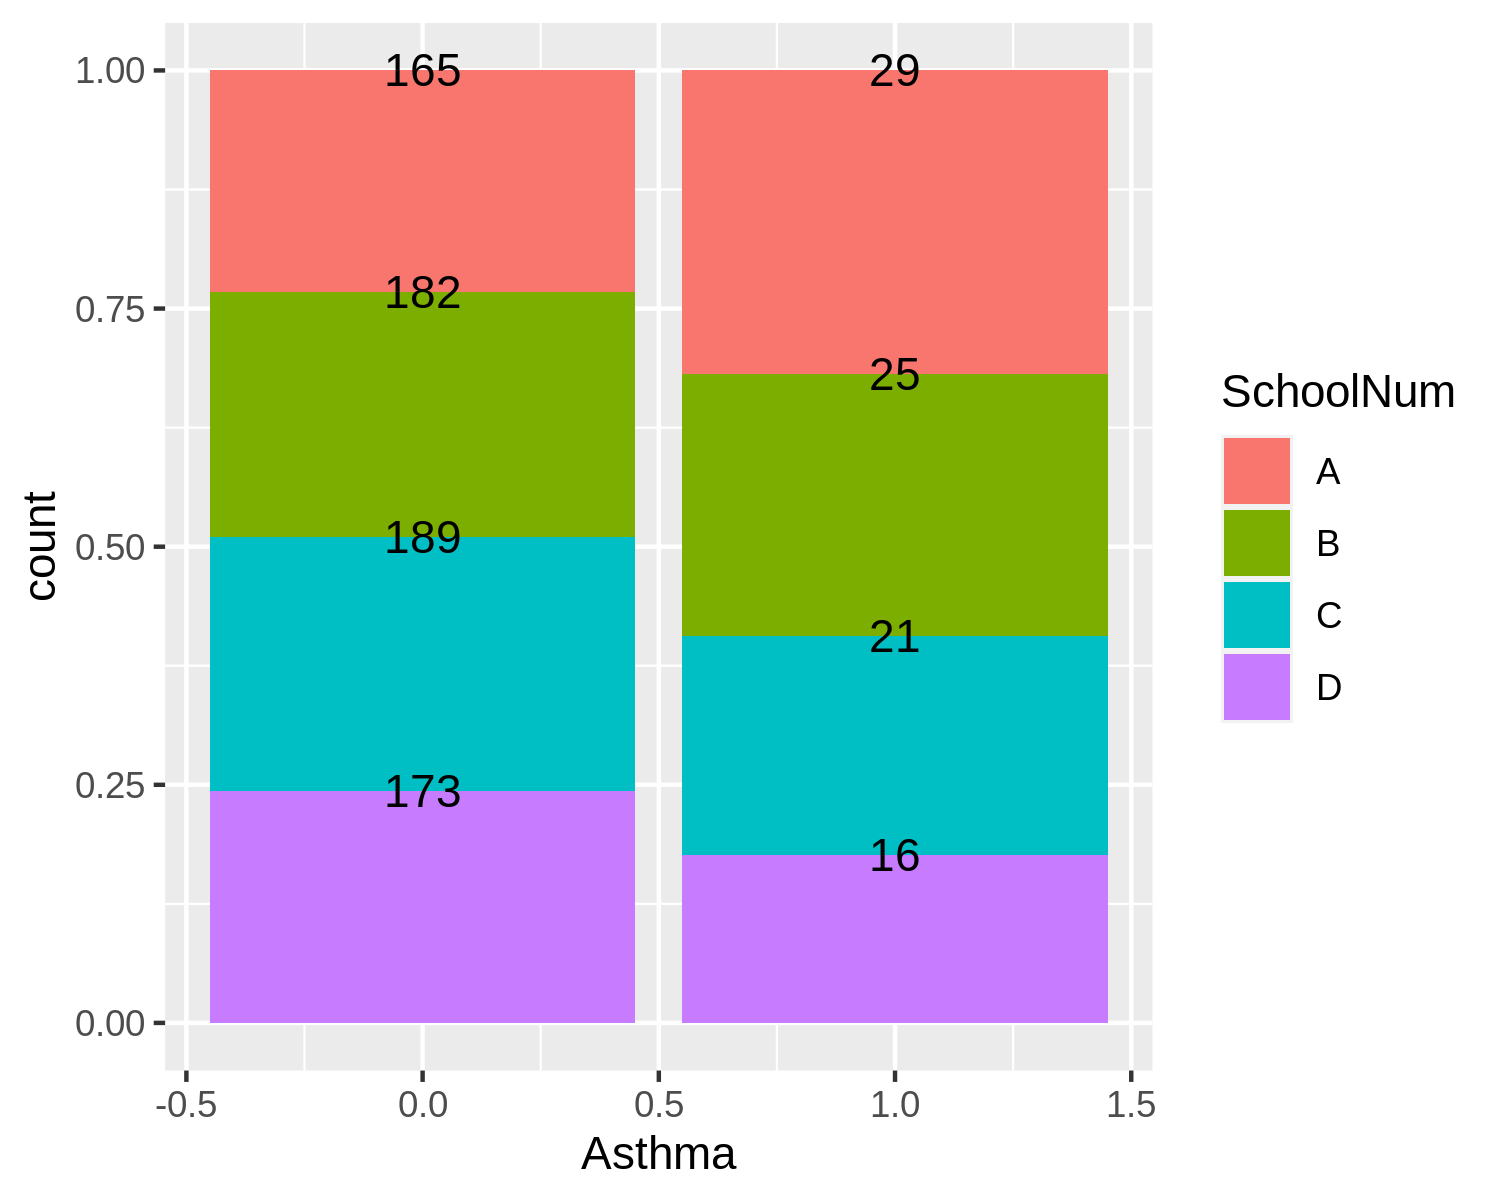

In [35]:
p = ggplot(df, aes(x = Asthma, fill = SchoolNum))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

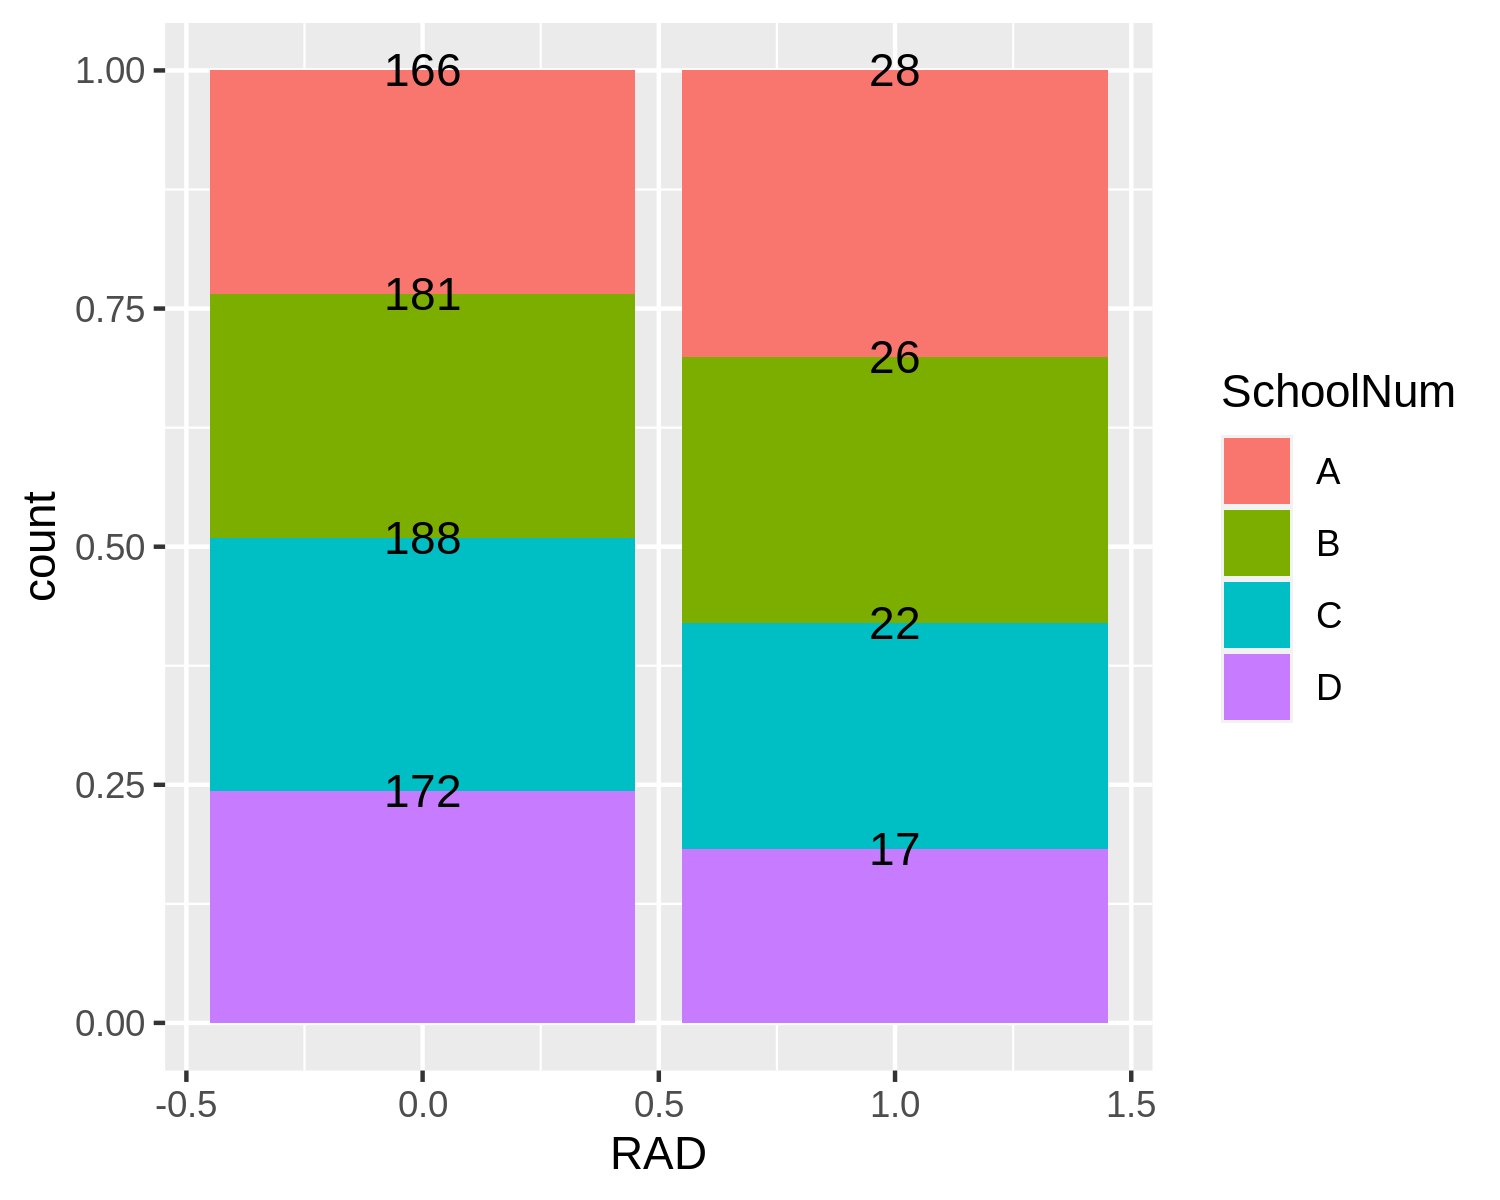

In [36]:
p = ggplot(df, aes(x = RAD, fill = SchoolNum))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

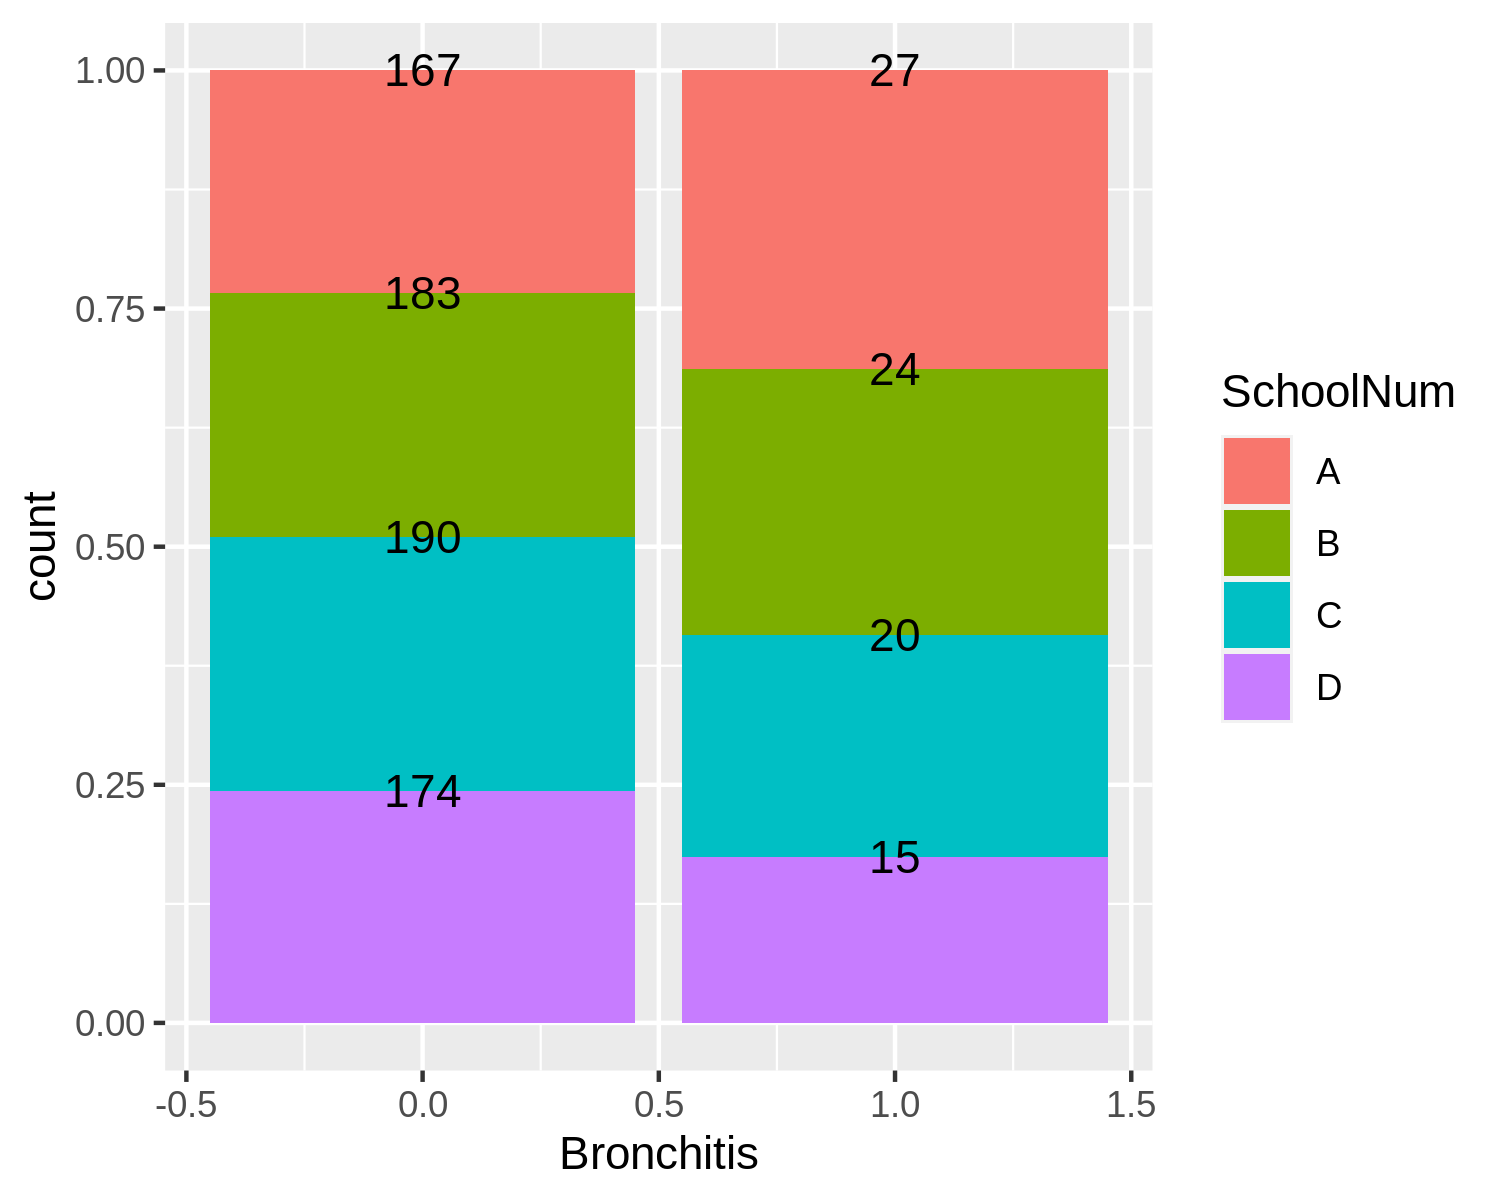

In [37]:
p = ggplot(df, aes(x = Bronchitis, fill = SchoolNum))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

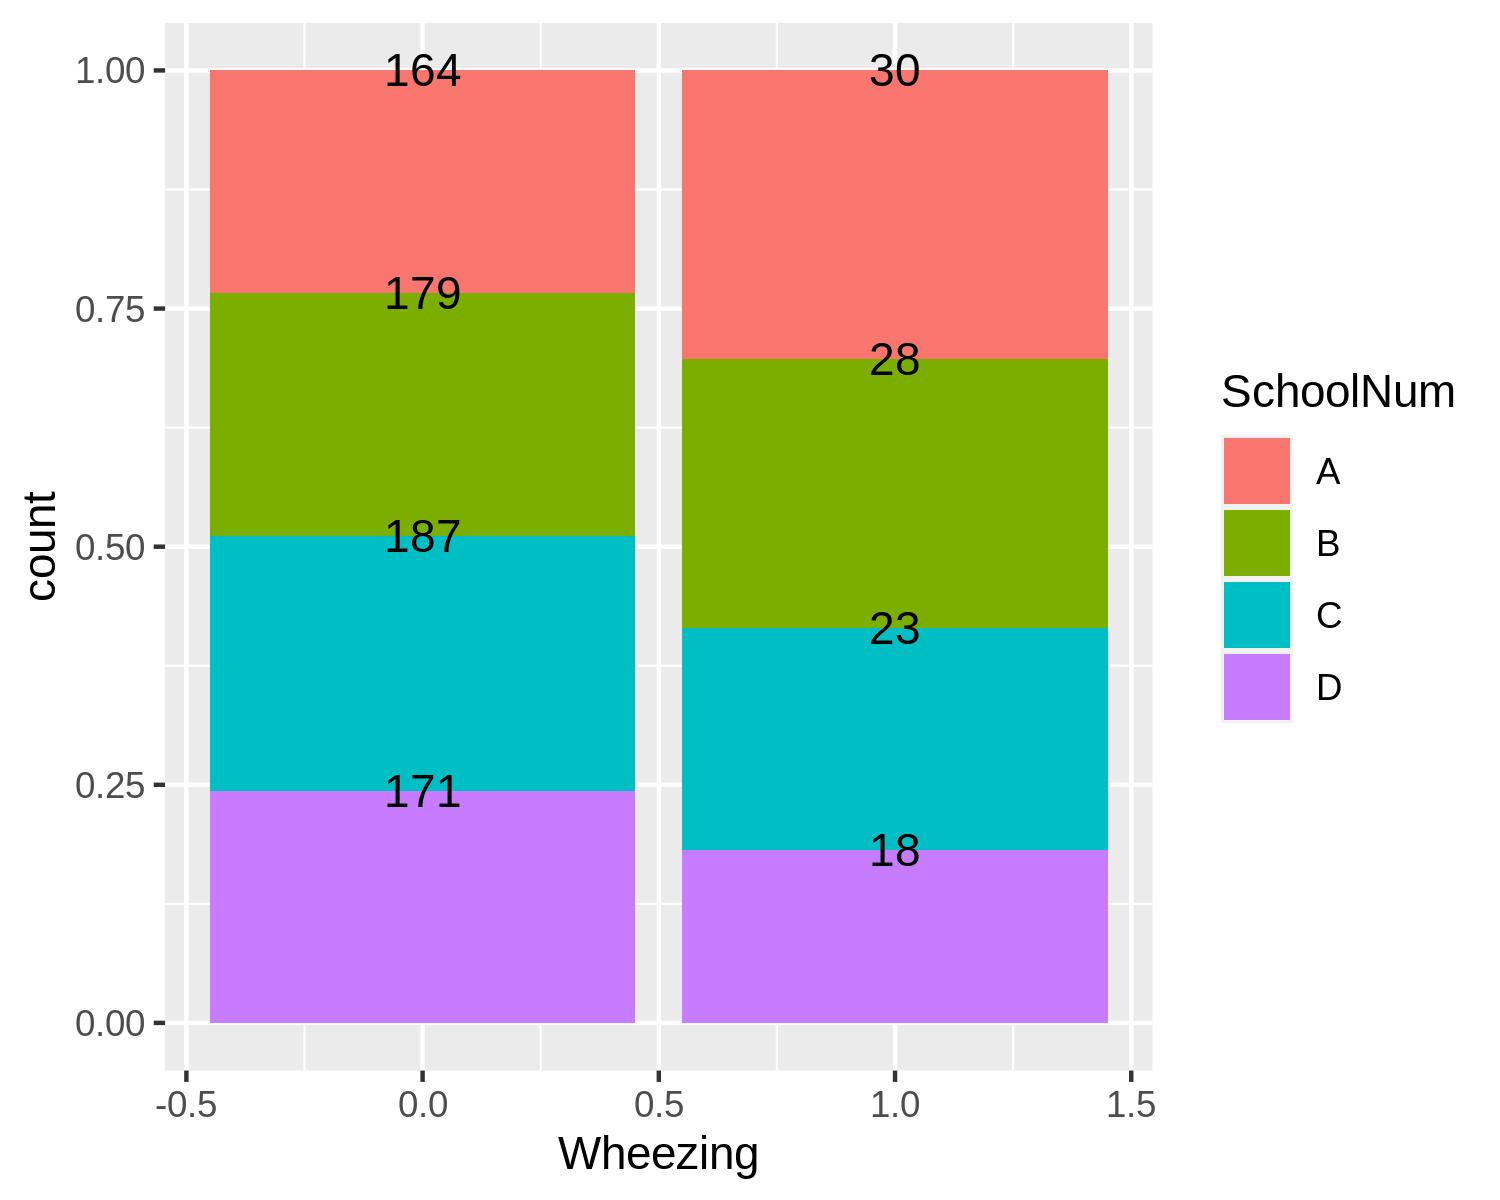

In [38]:
p = ggplot(df, aes(x = Wheezing, fill = SchoolNum))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

In [40]:
table(df['SchoolNum'])


  A   B   C   D 
194 207 210 189 

we should measure by prevalance. more appropriate to measure proportions rather than counts because of sample size 

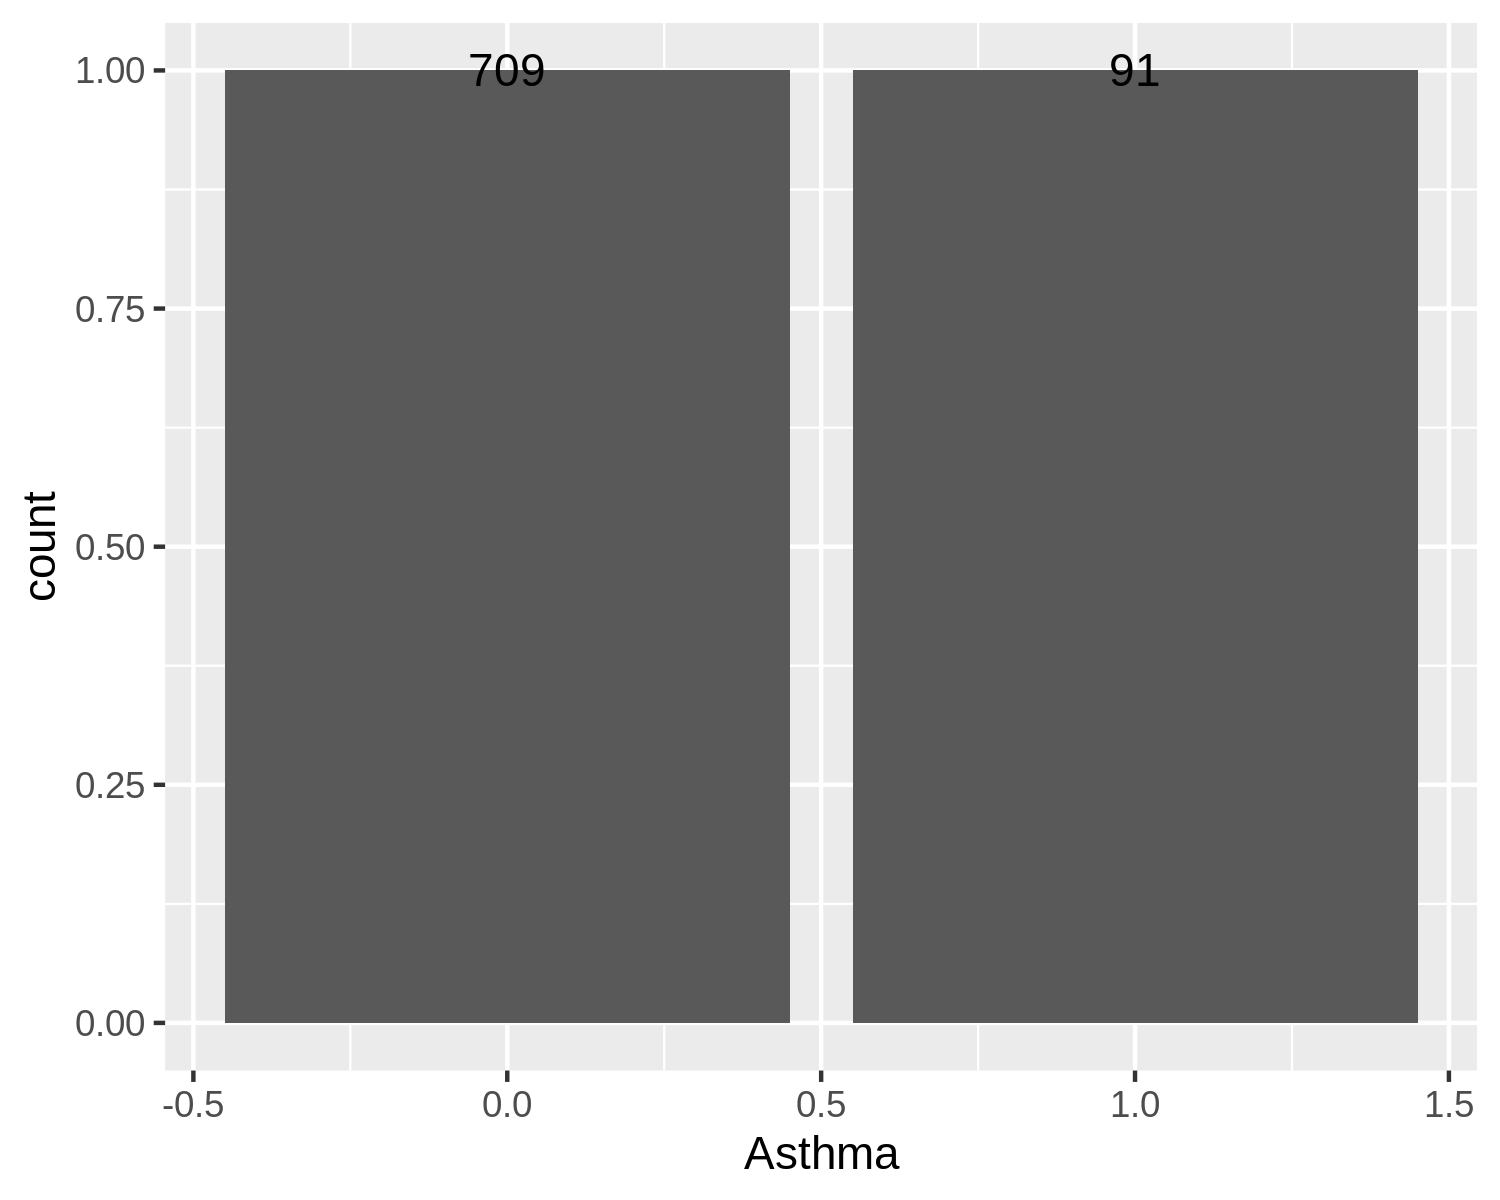

In [4]:
p = ggplot(df, aes(x = Asthma, fill = Medication))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

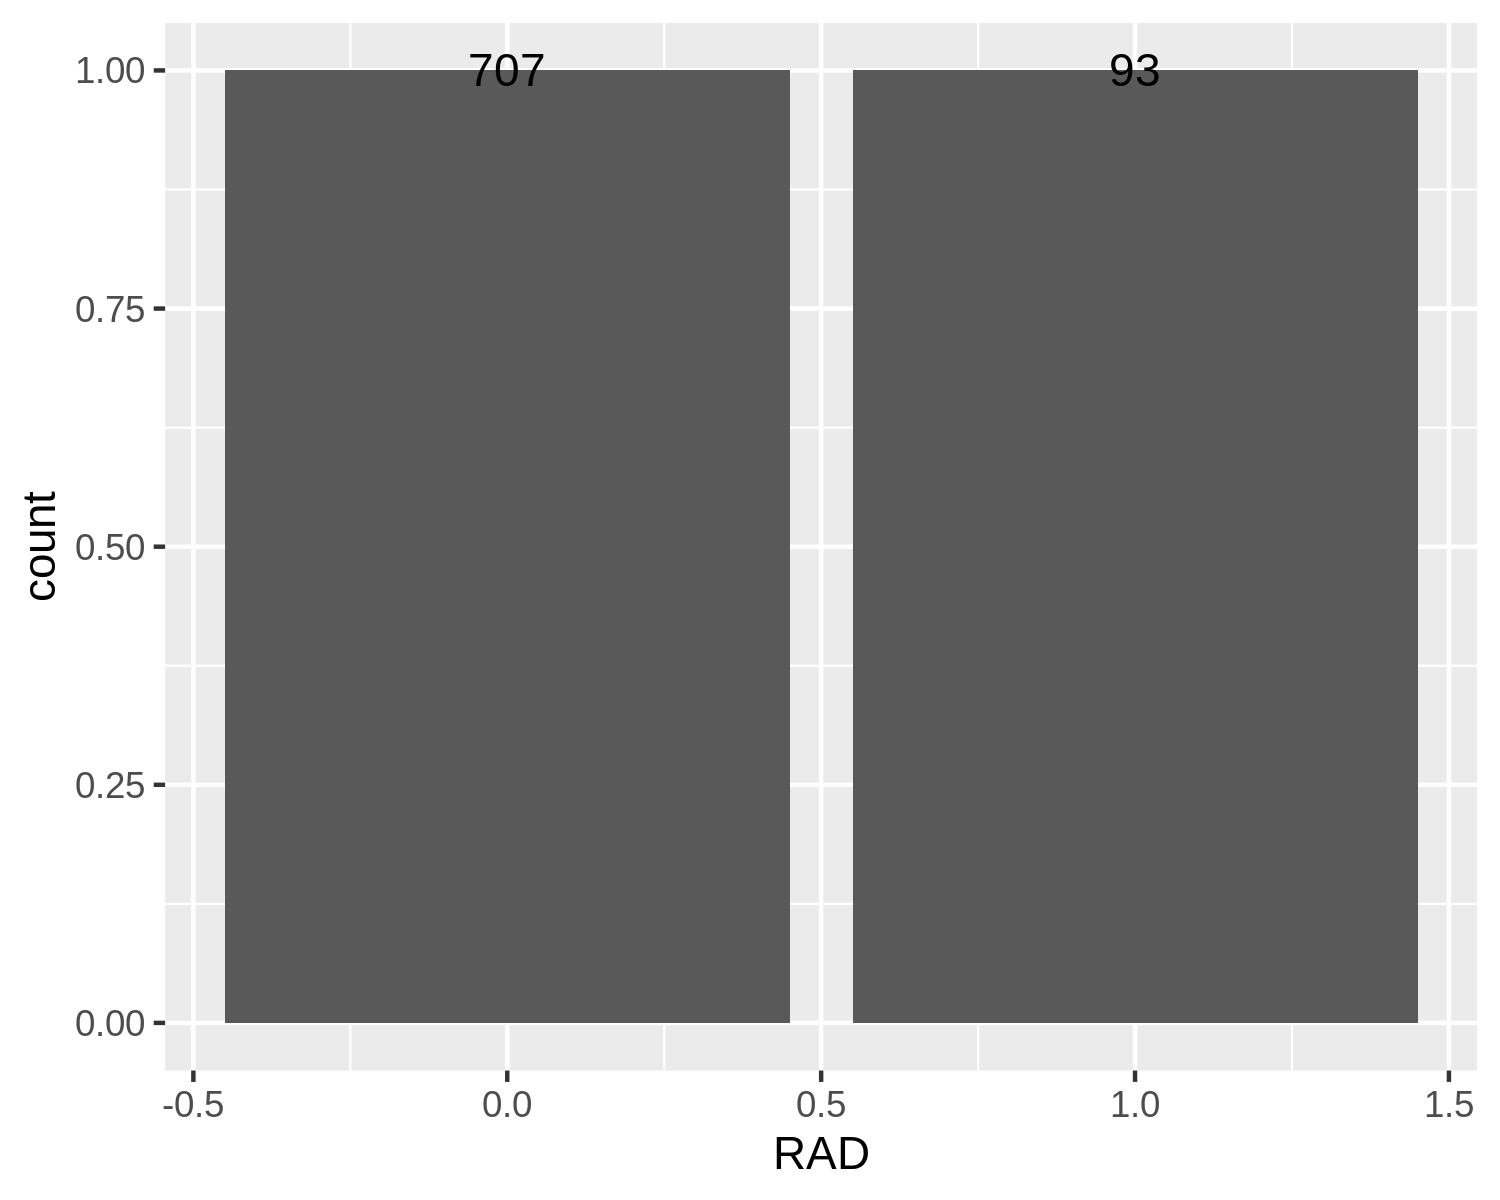

In [5]:
p = ggplot(df, aes(x = RAD, fill = Medication))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

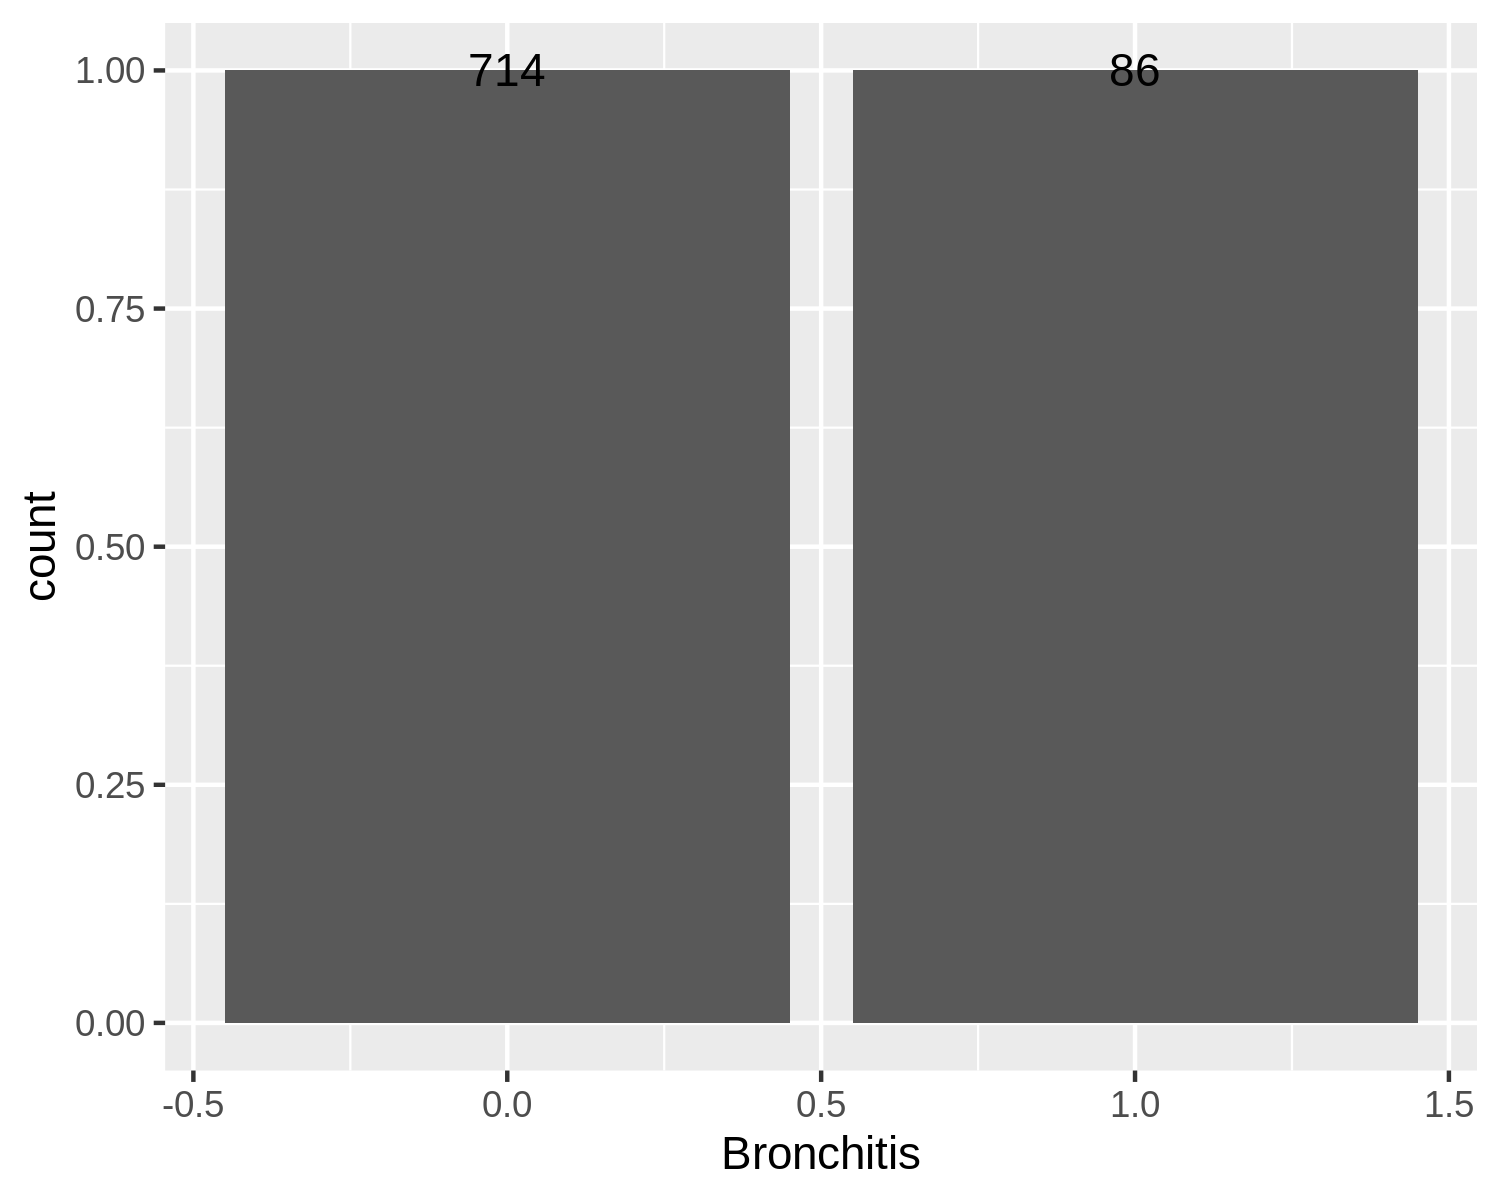

In [6]:
p = ggplot(df, aes(x = Bronchitis, fill = Medication))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

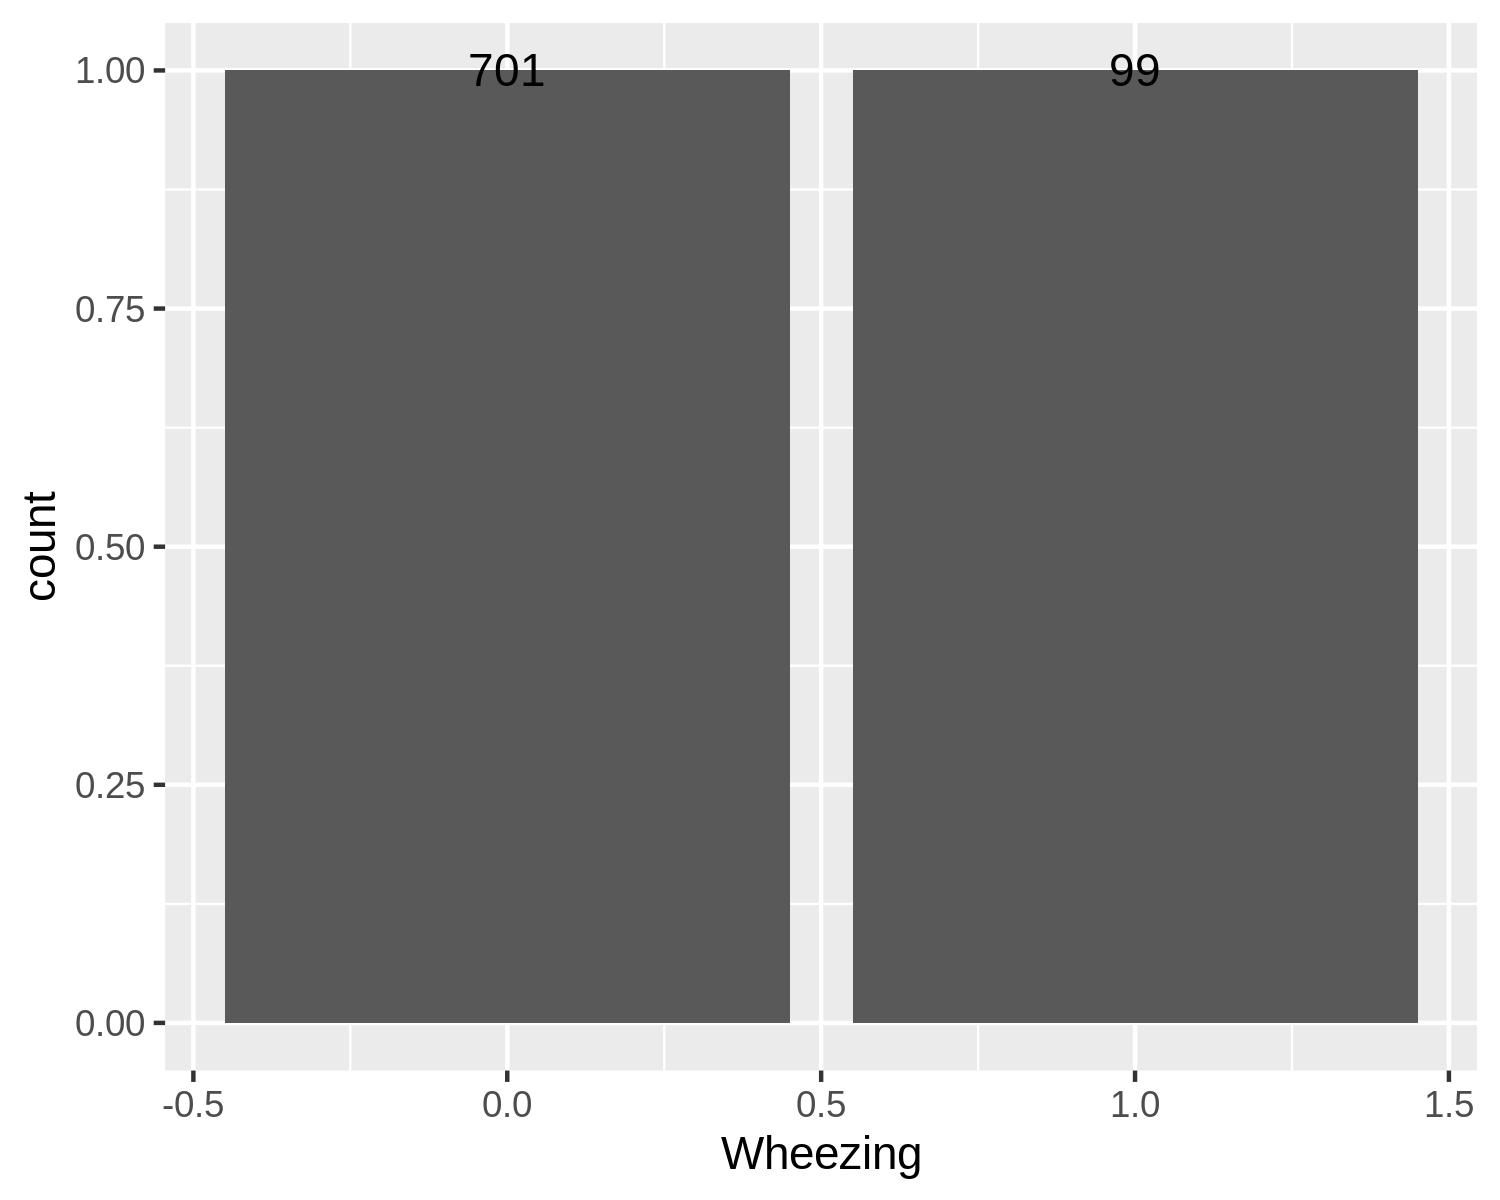

In [7]:
p = ggplot(df, aes(x = Wheezing, fill = Medication))

p = p + geom_bar(position = "fill") +  stat_count(geom = "text", 
             aes(label = stat(count)),
             position="fill", colour="black")

p

look at proportions of symptoms v medication. find out if a condition is more likely prescribed meds

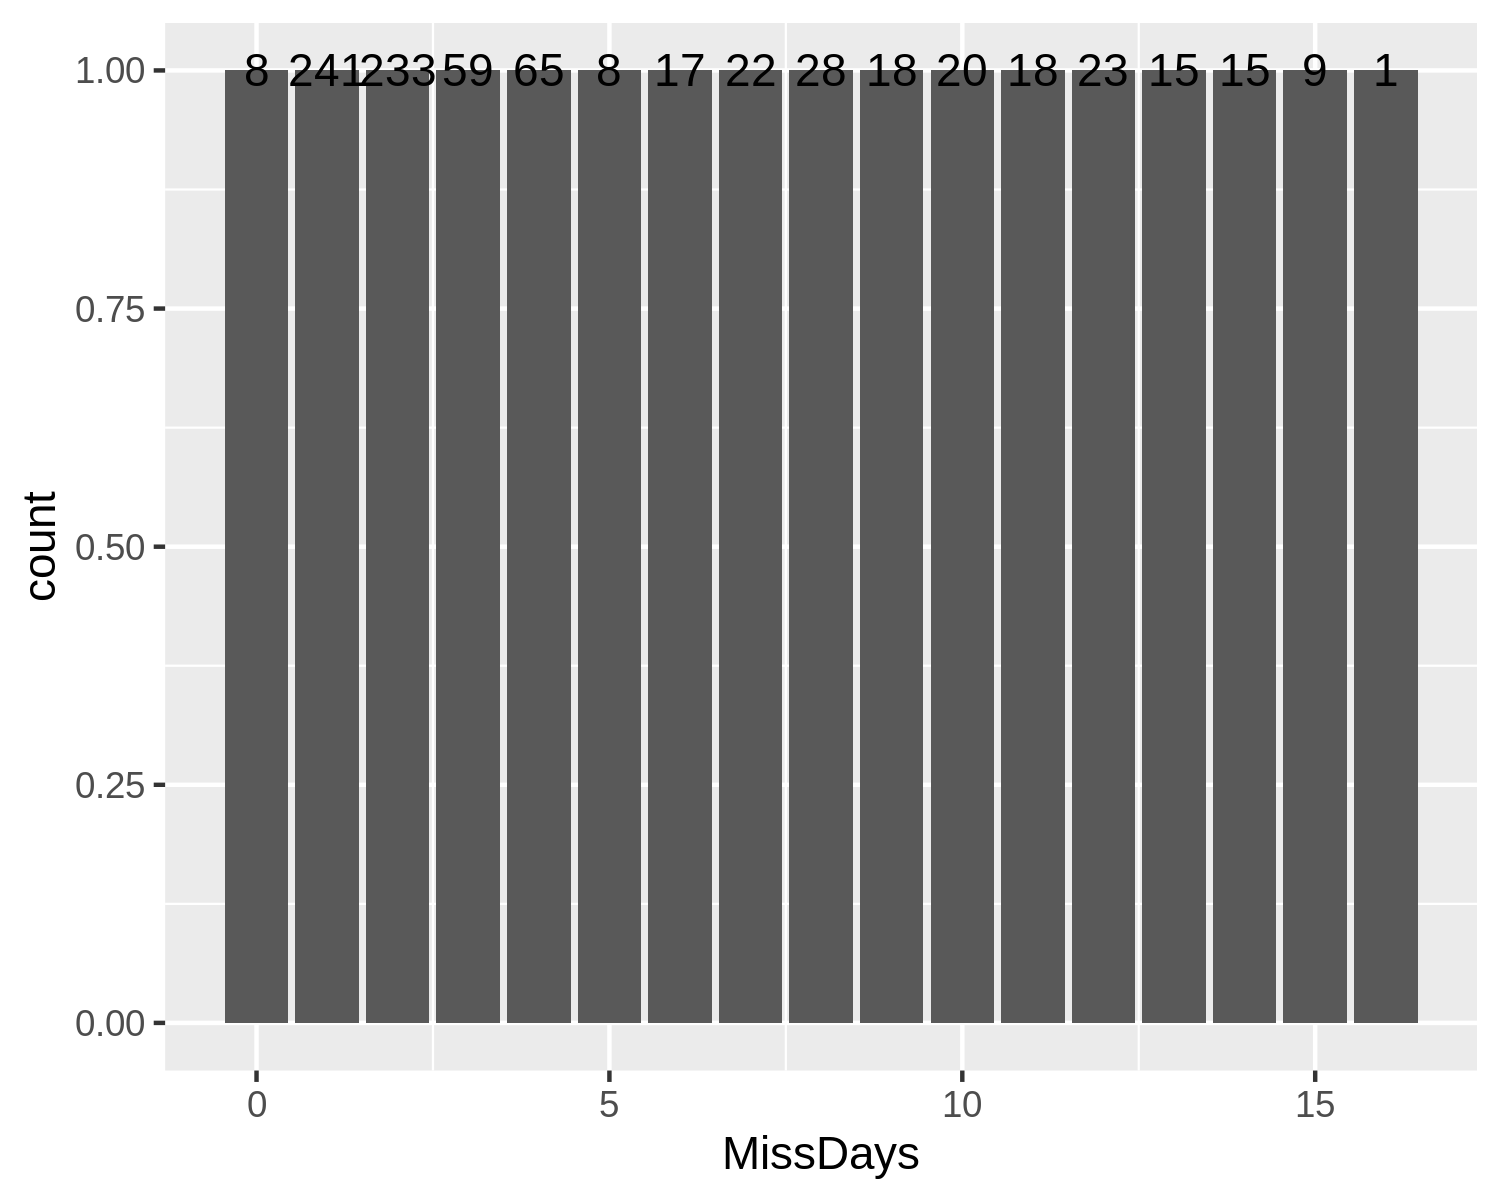

In [12]:
df %>% head

SchoolNum,StudentID,Gender,Zip,Age,Asthma,RAD,Bronchitis,Wheezing,Medication,WMonth,MissDays
<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
A,185,Male,12209,13,0,0,0,0,0,NA,2
A,124,Male,12204,12,0,0,0,0,0,NA,3
A,186,Male,12209,12,0,0,0,0,0,NA,1
A,34,Male,12210,12,0,0,1,0,0,7,9
A,1,Male,12207,12,1,0,0,1,1,9,10
A,62,Female,12183,12,0,0,0,1,0,1,9


In [25]:
#if ('Asthma'>0){mean('MissDays')}

Warning message in mean.default("MissDays", na.rm = FALSE):
“argument is not numeric or logical: returning NA”


[1] NA

In [31]:
#mean(df[df$'Asthma' > "1", 'MissDays'])


Warning message in mean.default(df[df$Asthma > "1", "MissDays"]):
“argument is not numeric or logical: returning NA”


[1] NA

In [32]:
df_Asthma = df %>% filter(Asthma == "1") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  12.3


In [34]:
df_RAD = df %>% filter(RAD == "1") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.9


In [35]:
df_Bronchitis = df %>% filter(Bronchitis == "1") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.8


In [36]:
df_Wheezing = df %>% filter(Wheezing == "1") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.7


In [38]:
df_Asthma_SchoolA = df %>% filter(Asthma == "1", SchoolNum == "A") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1    12


In [39]:
df_Asthma_SchoolB = df %>% filter(Asthma == "1", SchoolNum == "B") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  12.4


In [41]:
df_Asthma_SchoolC = df %>% filter(Asthma == "1", SchoolNum == "C") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  12.4


In [42]:
df_Asthma_SchoolD = df %>% filter(Asthma == "1", SchoolNum == "D") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  12.5


In [43]:
df_RAD_SchoolA = df %>% filter(RAD == "1", SchoolNum == "A") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.8


In [44]:
df_RAD_SchoolB = df %>% filter(RAD == "1", SchoolNum == "B") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.8


In [45]:
df_RAD_SchoolC = df %>% filter(RAD == "1", SchoolNum == "C") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1    11


In [46]:
df_RAD_SchoolD = df %>% filter(RAD == "1", SchoolNum == "D") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  11.2


In [47]:
df_Bronchitis_SchoolA = df %>% filter(Bronchitis == "1", SchoolNum == "A") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.1


In [48]:
df_Bronchitis_SchoolB = df %>% filter(Bronchitis == "1", SchoolNum == "B") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.5


In [49]:
df_Bronchitis_SchoolC = df %>% filter(Bronchitis == "1", SchoolNum == "C") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  12.2


In [50]:
df_Bronchitis_SchoolD = df %>% filter(Bronchitis == "1", SchoolNum == "D") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  11.1


In [51]:
df_Wheezing_SchoolA = df %>% filter(Wheezing == "1", SchoolNum == "A") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.9


In [52]:
df_Wheezing_SchoolB = df %>% filter(Wheezing == "1", SchoolNum == "B") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.8


In [53]:
df_Wheezing_SchoolC = df %>% filter(Wheezing == "1", SchoolNum == "C") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.7


In [54]:
df_Wheezing_SchoolD = df %>% filter(Wheezing == "1", SchoolNum == "D") %>% summarize(Avg = mean(MissDays)) %>% print

# A tibble: 1 × 1
    Avg
  <dbl>
1  10.4
